# Linear Regression

## Homework #2 by Glaktionova Natalia

New York City Airbnb Open Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Считываем и просматриваем данные

In [3]:
df = pd.read_csv('data/AB_NYC_2019.csv.zip', compression='zip')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0




Изучаем структуру данных. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
print('Количество признаков: %s' %df.shape[1])
print('Количество наблюдений: %s' %df.shape[0]) 

Количество признаков: 16
Количество наблюдений: 48895


Проверяем есть ли пустые значения

In [6]:
df.isnull().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Не все данные есть в столбцах **name, host_name, last_review, reviews_per_month**.
Первые три столбца мы не будем использовать в дальнейшем анализе. Пустые значения в reviews_per_month заменим нулями.
Также избавимся от столбцов id, host_id

In [7]:
df.drop(columns=['id','host_id','name','host_name','last_review'], inplace=True)

In [8]:
df.fillna(0, inplace=True)

Посмотрим на базовые статистики датасета

In [9]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Изучим категориальные признаки

In [10]:
df.describe(include=['object'])

,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


Уникальных значений для **neighbourhood** слишком много - 221. Ограничимся для анализа признаком **neighbourhood_group**

In [11]:
df.drop(columns=['neighbourhood'], inplace=True)

In [12]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Большая часть квартир находится в Бруклине и Манхэттене

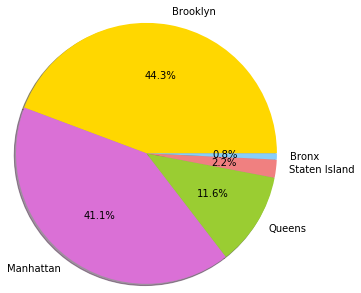

In [13]:
colors = ['gold', 'orchid','yellowgreen', 'lightcoral', 'lightskyblue']
labels = df.neighbourhood_group.unique()
plt.pie(df.neighbourhood_group.value_counts(), radius = 1.5, 
        labels = labels, colors = colors, autopct='%1.1f%%', shadow=True);

In [14]:
df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Общих комнат всего 2,4%, почти поровну отдельных комнат и целых домов/квартир

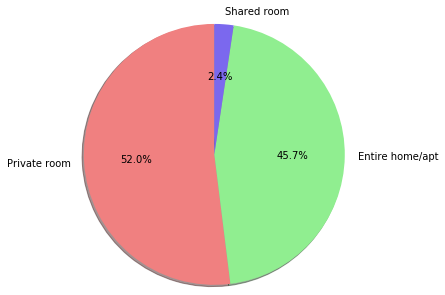

In [15]:
labels = df.room_type.unique()
colors = ['lightcoral', 'lightgreen','mediumslateblue']
plt.pie(df.room_type.value_counts(), radius = 1.5, 
        labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90);

Посмотрим распределение по типам комнат и по районам. 

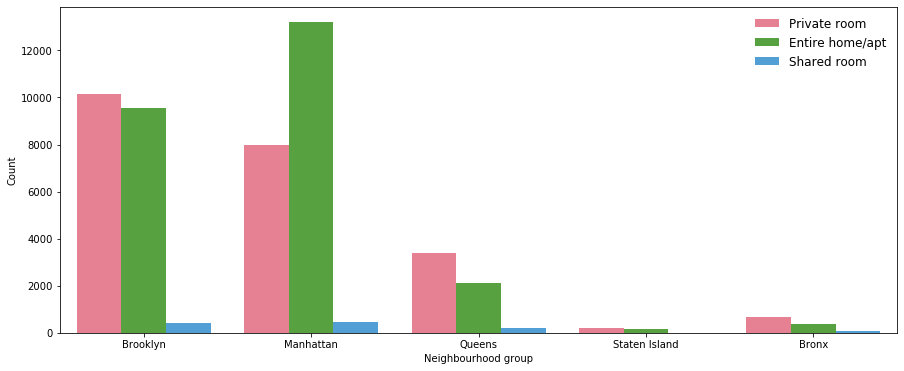

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='husl')
plt.xlabel('Neighbourhood group')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12);

Проанализируем целевую переменную **price**

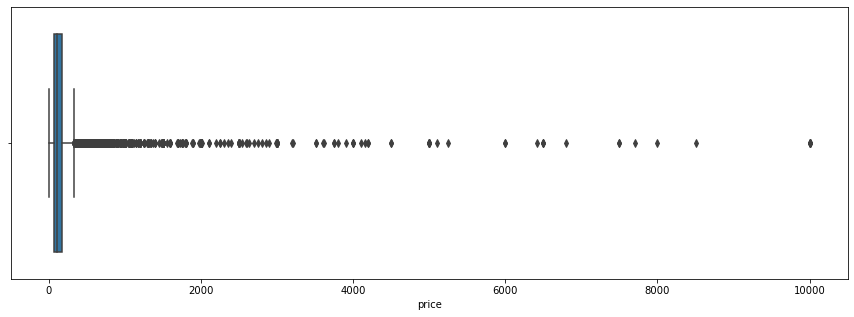

In [25]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df.price);

У нас много выбросов, посчитаем

In [26]:
df.price[df.price>1000].count()

239

In [27]:
df.price[df.price==0].count()

11

Удалим выбросы и нулевые значения

In [28]:
df.drop(df[df.price==0].index, inplace=True)
df.drop(df[df.price>1000].index, inplace=True)

Посмотрим распредение цен. Видим очень длинных хвост справа

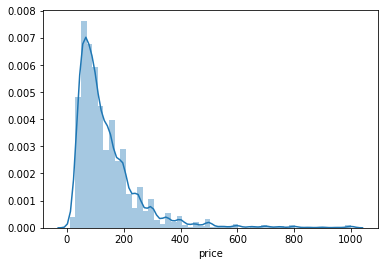

In [29]:
sns.distplot(df.price);

Сгладим распределение цен, прологарифмировав его. 

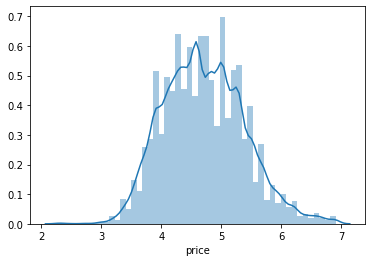

In [30]:
df['price'] = np.log(df['price'])
sns.distplot(df.price);

Посмотрим распределение цен в зависимости от района. Квартиры в Манхэттене определенно дороже

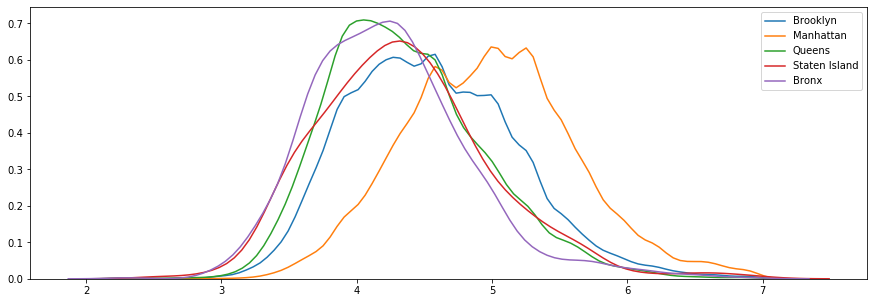

In [32]:
unique_vals = df['neighbourhood_group'].unique()
groups = [df.loc[df['neighbourhood_group'] == val] for val in unique_vals]
plt.figure(figsize=(15, 5))
for i, group in enumerate(groups):
    sns.distplot(group[['price']],hist=False,label=unique_vals[i])

Посмотрим распределение цен в зависимости от типа комнаты. Ожидаемо отдельные квартиры/дома - самые дорогие, а общие комнаты - самые дешевые.

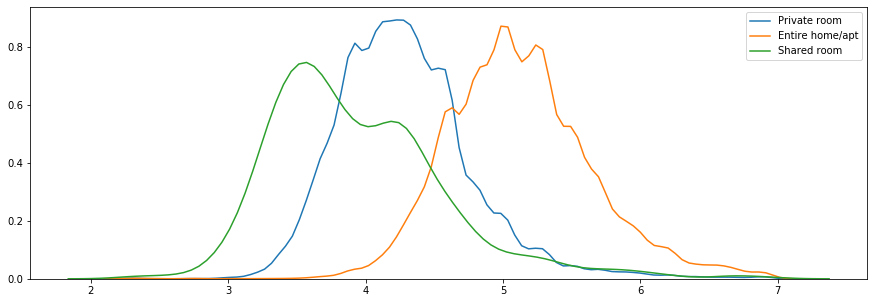

In [33]:
unique_vals = df['room_type'].unique()
groups = [df.loc[df['room_type'] == val] for val in unique_vals]
plt.figure(figsize=(15, 5))
for i, group in enumerate(groups):
    sns.distplot(group[['price']],hist=False,label=unique_vals[i])

Посмотрим на географическое положение комнат

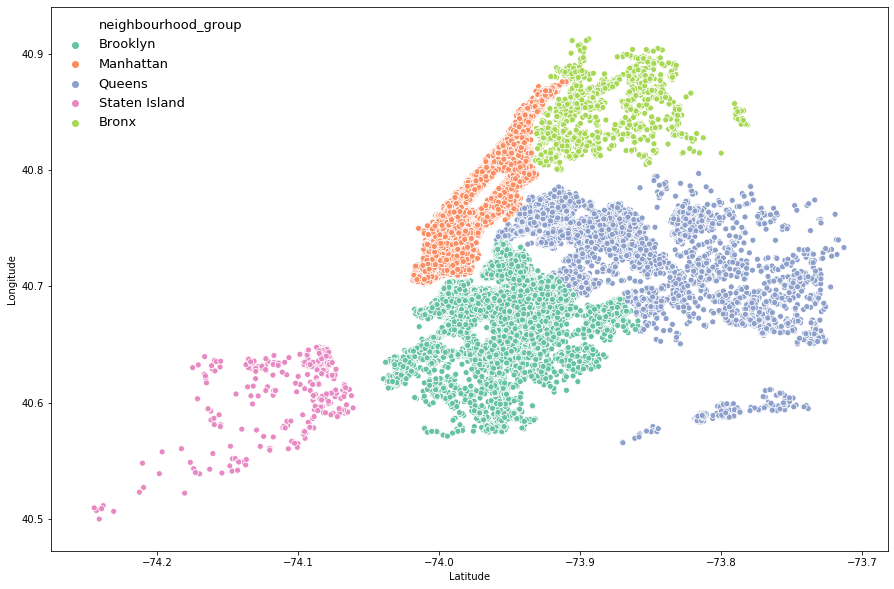

In [34]:
plt.figure(figsize=(15,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='Set2')
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13);

Разобьем комнаты на три ценовые категории и посмотрим как они распределены географически. Наше наблюдение о дорогом жилье на Манхэттене подтверждается

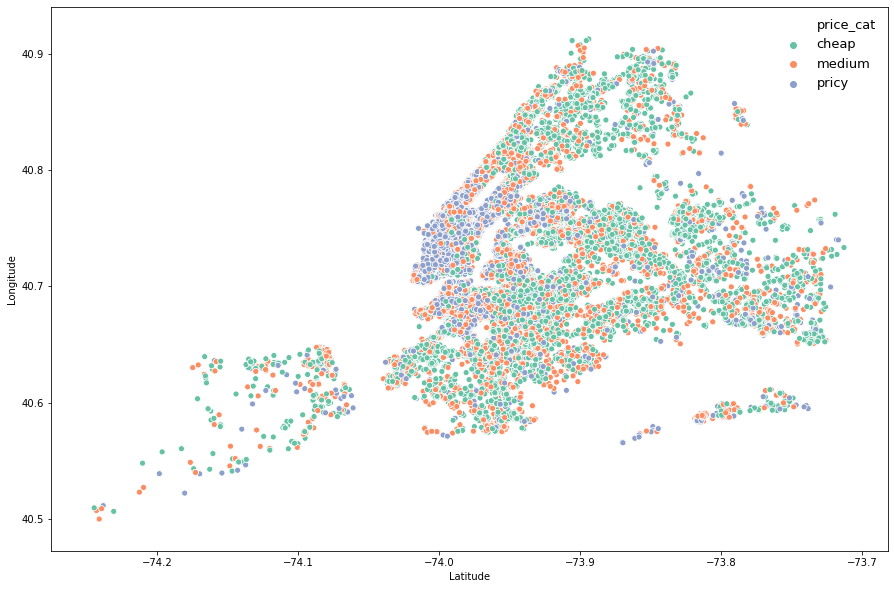

In [35]:
df["price_cat"] = pd.qcut(df.price, 3, labels=["cheap","medium","pricy"])

plt.figure(figsize=(15,10))
a = sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_cat', palette='Set2')
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13);

In [36]:
df.drop(columns=['price_cat'], inplace=True)

Согласно Википедии: 
*The centroid, or geographic center, of New York City is in Bushwick on Stockholm Street between Wyckoff Avenue and St. Nicholas Avenue*

Примем за центр координаты Bushwick, Brooklyn и посчитаем для каждой квартиры **расстояние от центра**

In [37]:
from scipy.spatial.distance import cdist

centre = np.array([40.694428, -73.921286]) #latitude, longitude of Bushwick
coordinates = pd.concat([df.latitude, df.longitude], axis=1).to_numpy()
df['distance'] = cdist(coordinates, np.atleast_2d(centre))

Теперь убираем уже ненужные признаки долготы и широты и посмотрим на распределение признаков

In [38]:
df.drop(columns=['latitude','longitude'], inplace=True)

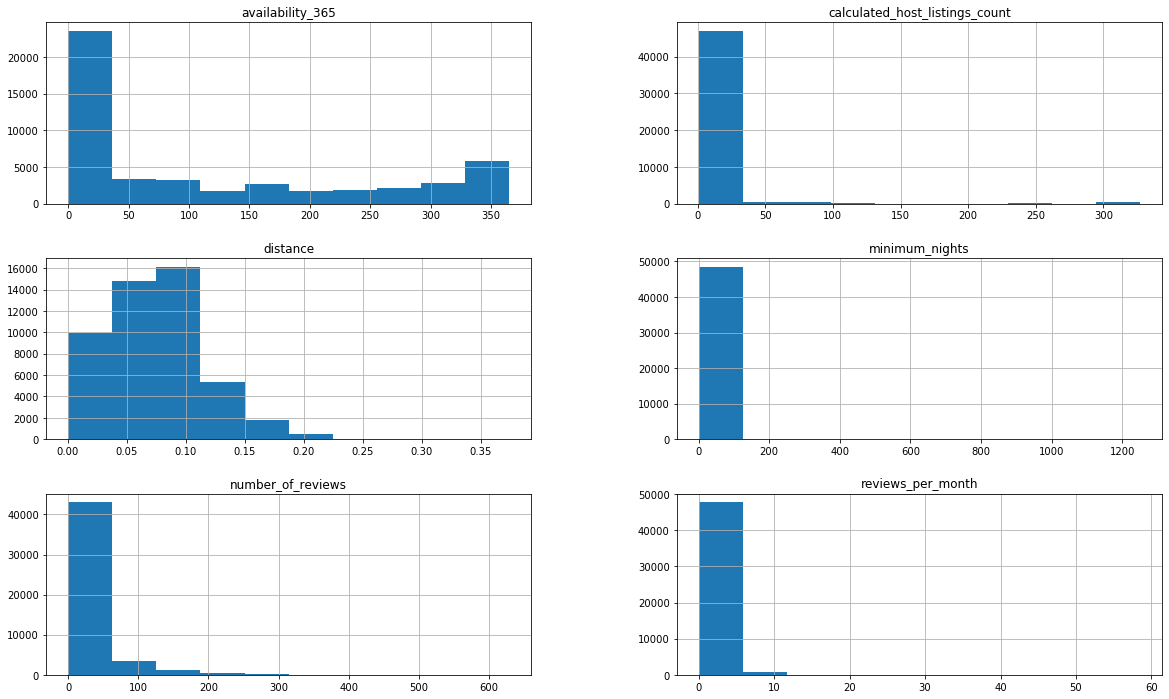

In [39]:
df.drop('price',axis=1).hist(figsize=(20, 12));


Строим тепловую карту по всем признакам. Самая сильная корреляция между количеством отзывов в месяц и общим количеством отзывов, что логично. 

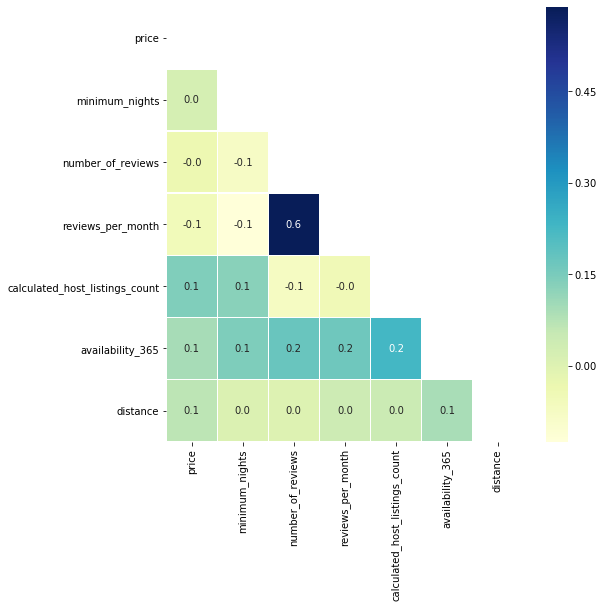

In [40]:
Corr = df.corr()
plt.figure(figsize=(8,8));
lower_corr = Corr.where(np.tril(np.ones(Corr.shape), k=-1).astype(np.bool))
sns.heatmap(lower_corr, annot=True, linewidths=.5, fmt='.1f', cmap="YlGnBu");

Проведем предобработку категориальных переменных

In [41]:
df_group = pd.get_dummies(df['neighbourhood_group'], drop_first=True, prefix='group')
df = pd.concat([df.drop('neighbourhood_group',axis=1),df_group], axis=1)

df_room = pd.get_dummies(df['room_type'], drop_first=True, prefix='room')
df = pd.concat([df.drop('room_type',axis=1),df_room], axis=1)

In [42]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,room_Private room,room_Shared room
0,5.003946,1,9,0.21,6,365,0.069374,1,0,0,0,1,0
1,5.416100,1,45,0.38,2,355,0.086069,0,1,0,0,0,0
2,5.010635,3,0,0.00,1,365,0.116431,0,1,0,0,1,0
3,4.488636,1,270,4.64,1,194,0.039579,1,0,0,0,0,0
4,4.382027,10,9,0.10,1,0,0.106529,0,1,0,0,0,0


## Regression

Делим на трейн и тест

In [43]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_train[['minimum_nights', 'reviews_per_month', 
                     'calculated_host_listings_count', 
                     'availability_365', 'distance']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
df_train_scale = scaler.transform(df_train[['minimum_nights', 'reviews_per_month', 
                     'calculated_host_listings_count', 'availability_365', 'distance']])
 
df_test_scale = scaler.transform(df_test[['minimum_nights', 'reviews_per_month', 
                     'calculated_host_listings_count', 'availability_365', 'distance']])

In [46]:
df_train[['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
          'availability_365', 'distance']] = df_train_scale
df_test[['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
          'availability_365', 'distance']] = df_test_scale

In [47]:
df_train.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance,group_Brooklyn,group_Manhattan,group_Queens,group_Staten Island,room_Private room,room_Shared room
608,5.298317,-0.096395,1,-0.685797,-0.187069,-0.851255,0.209274,1,0,0,0,0,0
24045,4.787492,-0.238769,6,-0.114243,-0.187069,-0.455924,-0.983924,1,0,0,0,1,0
28966,3.806662,-0.286227,1,-0.660394,-0.156493,-0.851255,-1.492277,1,0,0,0,1,0
44773,3.850148,1.090057,0,-0.692147,2.931711,1.018965,-0.467546,0,0,1,0,1,0
17407,4.553877,-0.286227,2,-0.654044,-0.187069,-0.851255,1.118309,0,1,0,0,0,0


Подготовим метрики для оценки моделей

In [48]:
from sklearn import metrics

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
def print_metrics(y_test,y_pred):
    MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))
    RMSE = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))
    R2 = metrics.r2_score(np.exp(y_test), np.exp(y_pred))
    MAPE = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
        
    quality_list = [MAE, RMSE, R2, MAPE]
    
    return quality_list

## Линейная регрессия

In [56]:
y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()

**"Наивная регрессия"**

In [57]:
y_mean = np.mean(y_train)                    
y_pred_naive = np.ones(len(y_test)) * y_mean  

In [58]:
quality_list_lr = print_metrics(y_test, y_pred_naive)

df_quality = pd.DataFrame(
    [quality_list_lr],
    columns=["MAE", "RMSE", "R2", "MAPE"],
    index=["naive_regression"])

df_quality.round(3)

,MAE,RMSE,R2,MAPE
naive_regression,72.877,118.786,-0.064,60.914


In [59]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)

In [60]:
df_quality.loc["lin_regression", :] = print_metrics(y_test, y_pred_regr)

df_quality.round(3)

,MAE,RMSE,R2,MAPE
naive_regression,72.877,118.786,-0.064,60.914
lin_regression,52.139,97.165,0.288,37.037


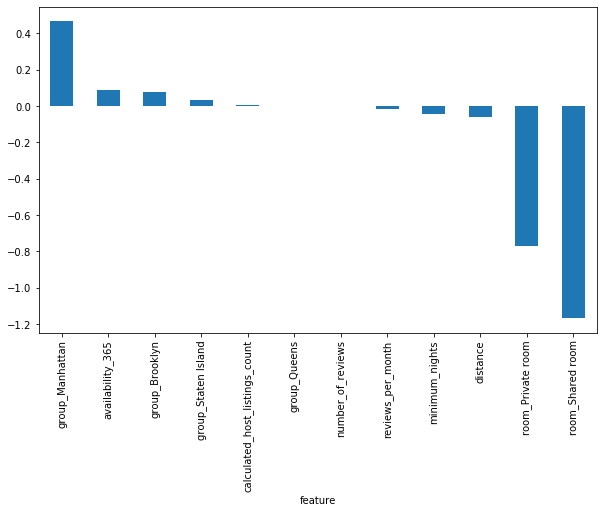

In [61]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

**LassoCV**

In [62]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

y_pred_lasso_cv = lasso_cv.predict(X_test)

In [63]:
df_quality.loc["lasso cv", :] = print_metrics(y_test, y_pred_lasso_cv)
df_quality.round(3)

,MAE,RMSE,R2,MAPE
naive_regression,72.877,118.786,-0.064,60.914
lin_regression,52.139,97.165,0.288,37.037
lasso cv,52.135,97.304,0.286,37.049


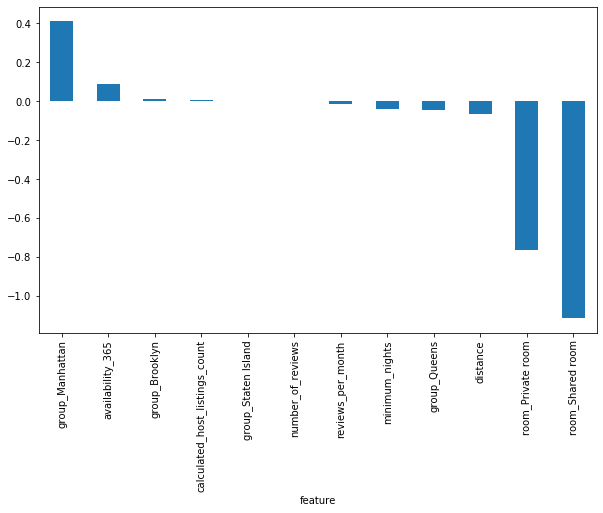

In [64]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

**RidgeCV**

In [65]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV()
ridge_cv.fit(X_train, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test)

In [66]:
df_quality.loc["ridge cv", :] = print_metrics(y_test, y_pred_ridge_cv)
df_quality.round(3)

,MAE,RMSE,R2,MAPE
naive_regression,72.877,118.786,-0.064,60.914
lin_regression,52.139,97.165,0.288,37.037
lasso cv,52.135,97.304,0.286,37.049
ridge cv,52.139,97.167,0.288,37.038


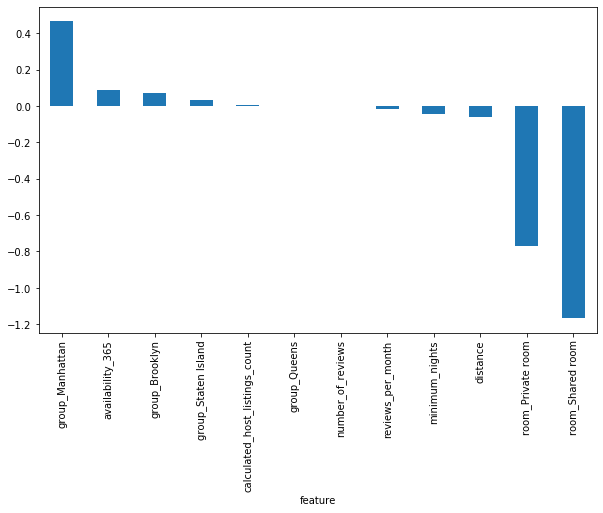

In [67]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": ridge_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

**ElasticNet**

In [68]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,
                    param_grid={'alpha':np.logspace(-5,2,8),
                                'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',
                    n_jobs=1,refit=True,cv=10)

In [69]:
search.fit(X_train,y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [70]:
elastic_net=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic_net.fit(X_train, y_train)

y_pred_elasctic_net = elastic_net.predict(X_test)

In [71]:
df_quality.loc["elasctic net", :] = print_metrics(y_test, y_pred_elasctic_net)
df_quality.round(3)

,MAE,RMSE,R2,MAPE
naive_regression,72.877,118.786,-0.064,60.914
lin_regression,52.139,97.165,0.288,37.037
lasso cv,52.135,97.304,0.286,37.049
ridge cv,52.139,97.167,0.288,37.038
elasctic net,52.235,98.073,0.275,37.193


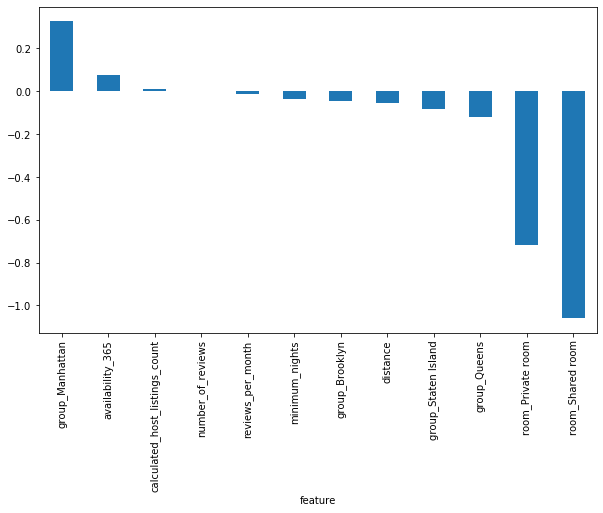

In [72]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": elastic_net.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

Все модели работают примерно одинаково и лучше "наивной" регрессии.
Как мы и наблюдали самое заметное влияние на рост цены оказывает местоположение квартиры в Манхэттене.
На снижение цены самое заметное влияние оказывает тип комнаты: приватный либо общий.